In [1]:
import numpy as np
import pandas as pd
from astropy.io import fits
from matplotlib import pyplot as plt
import os
import archive.database
import matplotlib.colors as mcolors

In [2]:
os.getcwd()

'/data/des81.b/data/pferguso/DELVE_WIDE/notebooks'

In [3]:
datapath='/data/des81.b/data/pferguso/DELVE_WIDE/RawData/FNAL/Downloads/'
zptpath='/data/des81.b/data/pferguso/DELVE_WIDE/RawData/FNAL/'

In [4]:
df_filepaths=pd.read_csv(zptpath+"DELVE_Calib_filepaths_fnal.csv")

In [5]:
df_filepaths.columns

Index([u'EXPNUM', u'CCDNUM', u'BAND', u'FILEPATH'], dtype='object')

In [6]:
#read in I-Band catalog
# Select ones with low "MAG_ZERO_NUM"
# Match these with the query containing t_eff and astrom_chi2
gzpts=pd.read_csv(zptpath+'zps.matched-rawdata_refcat2_DEEP.g.csv')
badset=gzpts[gzpts["MAG_ZERO_NUM"] < 5]
expnumset=[int(i[3:9]) for i in badset["FILENAME_2"].values]
#tvec=[i in expnumset for i in df_filepaths["expnum"]]

# #same thing but only the SEXTANS Exposures 
# b2set=badset[badset["RA_1_MEDIAN"]>100]
# expnumset2=[int(i[3:9]) for i in b2set["FILENAME_2"].values]
# tvec2=[i in expnumset2 for i in df_filepaths["expnum"]]

In [7]:
os.listdir(zptpath)

['runAll.bash',
 'TmpDir',
 'QA',
 'DELVE_Calib_filepaths_fnal.csv',
 'DELVE_Calib_expinfo_fnal.csv',
 'DELVE_Calib_imginfo_fnal.csv',
 'DELVE_Calib_fileimgexp_query_fnal_wide.20200131.log',
 'DELVE_Calib_imgfileinfo_fnal.csv',
 'DELVE_Calib_expimgfileinfo_fnal.csv',
 'Downloads',
 'DELVE_grab_relevant_refcat2_data.20200131.log',
 'ATLAS_REFCAT_2.DELVE_DEEP_area.csv',
 'runConvert_se_objectsFile_fnal.20200131.g.log',
 'DELVE_Calib_concat_se_objects_fnal.20200131.g.log',
 'rawData.DELVE_Calib_DEEP.g.csv',
 'DELVE_matchSortedStdObsCats.20200131.g.log',
 'matched-rawdata_refcat2_DEEP.g.csv',
 'DELVE_tie_to_refcat2.20200131.g.log',
 'zps.matched-rawdata_refcat2_DEEP.g.csv',
 'runConvert_se_objectsFile_fnal.20200203.r.log',
 'DELVE_grab_relevant_refcat2_data.20200203.log',
 'runConvert_se_objectsFile_fnal.20200203.i.log',
 'runConvert_se_objectsFile_fnal.20200203.z.log',
 'DELVE_Calib_concat_se_objects_fnal.20200203.r.log',
 'rawData.DELVE_Calib_DEEP.r.csv',
 'DELVE_matchSortedStdObsCats.20

In [57]:
gerr_big_set=gzpts[(gzpts["MAG_ZERO_NUM"] < 30) ]
gerr_expnum=[int(i[3:9]) for i in gerr_big_set["FILENAME_2"].values]
gerr_vec=[i in gerr_expnum for i in df_filepaths["EXPNUM"]]

In [58]:
gframe=pd.DataFrame()
for i in gzpts["FILENAME_2"]:
 gframe=gframe.append(df_filepaths[df_filepaths["EXPNUM"]==int(i[3:9])])

In [17]:
min(gzpts['MAG_ZERO_MEAN_ERR'])

0.0015

In [51]:
print(np.mean(gzpts['MAG_ZERO_MEAN_ERR'].dropna()),
np.median(gzpts['MAG_ZERO_MEAN_ERR'].dropna()),
np.std(gzpts['MAG_ZERO_MEAN_ERR'].dropna()))
logbins=10**np.linspace(-3,0,50)

AttributeError: 'module' object has no attribute 'mad'

In [157]:
len(gzpts["MAG_ZERO_MEAN_ERR"])

19068

In [148]:
ind1=(gzpts.dropna()["MAG_ZERO_NUM"]>55) & (gzpts.dropna()["MAG_ZERO_MEAN_ERR"]<10**-2)
ind2=(gzpts.dropna()["MAG_ZERO_NUM"]<55)& (gzpts.dropna()["MAG_ZERO_NUM"]>30) & (gzpts.dropna()["MAG_ZERO_MEAN_ERR"]<10**-2)
ind3=(gzpts.dropna()["MAG_ZERO_NUM"]>30) & (gzpts.dropna()["MAG_ZERO_MEAN_ERR"]>10**-2)
ind4=(gzpts.dropna()["MAG_ZERO_NUM"]<30)


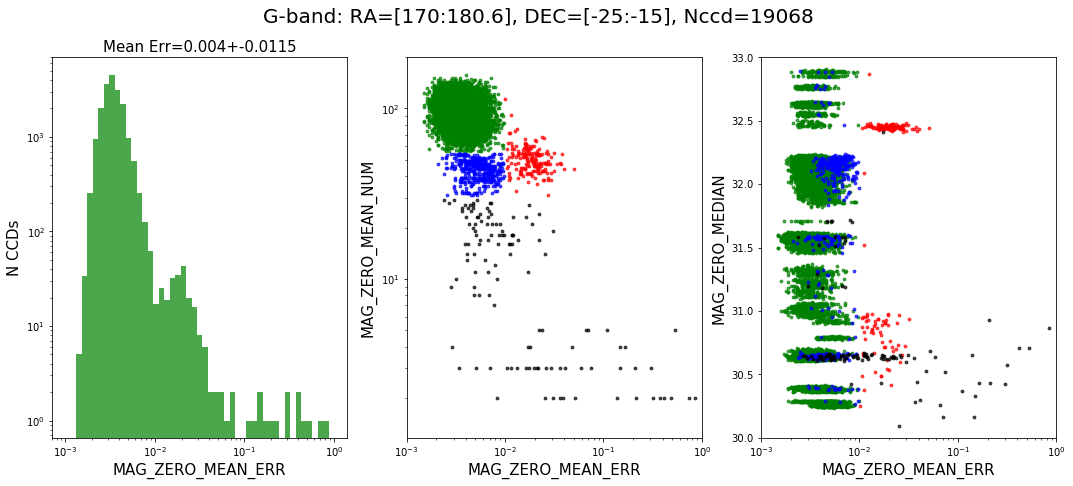

In [151]:

fig = plt.figure(figsize=(18,7))
plt.suptitle('G-band: RA=[170:180.6], DEC=[-25:-15], Nccd='+str(len(gzpts['MAG_ZERO_MEAN_ERR'])),fontsize=20)
plt.subplot(131)

plt.hist(gzpts['MAG_ZERO_MEAN_ERR'].dropna(), alpha=0.7, color="green", bins=logbins)
plt.yscale('log')
plt.xscale('log')
#
#plt.scatter(gerr_big_set["MAG_ZERO_NUM"],gerr_big_set["MAG_ZERO_MEAN_ERR"],s=8,alpha=0.7,c="blue")
#plt.xlim(146,154)
#plt.ylim(1,10)
plt.ylabel("N CCDs",fontsize=15)
plt.xlabel("MAG_ZERO_MEAN_ERR",fontsize=15)
#cb = plt.colorbar()
#cb.set_label('MAG_ZERO_MEAN')
plt.title('Mean Err='+str(round(np.mean(gzpts['MAG_ZERO_MEAN_ERR'].dropna()),4))
          +"+-"+str(round(np.std(gzpts['MAG_ZERO_MEAN_ERR'].dropna()),4)),fontsize=15)

plt.subplot(132)
#plt.hist2d(np.log(gzpts.dropna()["MAG_ZERO_NUM"]),np.log(gzpts.dropna()["MAG_ZERO_MEAN_ERR"]),
#           bins=50,norm=mcolors.PowerNorm(0.4))#,s=8,alpha=0.7,c="green")
plt.scatter(gzpts.dropna()["MAG_ZERO_MEAN_ERR"][ind1],
            gzpts.dropna()["MAG_ZERO_NUM"][ind1],s=8,alpha=0.7,c="green")
plt.scatter(gzpts.dropna()["MAG_ZERO_MEAN_ERR"][ind2],
            gzpts.dropna()["MAG_ZERO_NUM"][ind2],s=8,alpha=0.7,c="blue")
plt.scatter(gzpts.dropna()["MAG_ZERO_MEAN_ERR"][ind3],
            gzpts.dropna()["MAG_ZERO_NUM"][ind3],s=8,alpha=0.7,c="red")
plt.scatter(gzpts.dropna()["MAG_ZERO_MEAN_ERR"][ind4],
            gzpts.dropna()["MAG_ZERO_NUM"][ind4],s=8,alpha=0.7,c="black")
# plt.scatter(gzpts.dropna()["MAG_ZERO_NUM"][(gzpts.dropna()["MAG_ZERO_NUM"]<55)],
#             gzpts.dropna()["MAG_ZERO_MEAN_ERR"][(gzpts.dropna()["MAG_ZERO_NUM"]<55)],s=8,alpha=0.7,c="blue")
# plt.scatter(gzpts.dropna()["MAG_ZERO_NUM"][(gzpts.dropna()["MAG_ZERO_MEAN_ERR"]>10**-2)],
#             gzpts.dropna()["MAG_ZERO_MEAN_ERR"][(gzpts.dropna()["MAG_ZERO_MEAN_ERR"]>10**-2)],s=8,alpha=0.7,c="red")
# plt.scatter(gzpts.dropna()["MAG_ZERO_NUM"][(gzpts.dropna()["MAG_ZERO_NUM"]<30)],
#             gzpts.dropna()["MAG_ZERO_MEAN_ERR"][(gzpts.dropna()["MAG_ZERO_NUM"]<30)],s=8,alpha=0.7,c="black")
plt.yscale('log')
plt.xscale('log')
plt.xlim(10**-3,1)
plt.ylabel("MAG_ZERO_MEAN_NUM",fontsize=15)
plt.xlabel("MAG_ZERO_MEAN_ERR",fontsize=15)

plt.subplot(133)
plt.scatter(gzpts.dropna()["MAG_ZERO_MEAN_ERR"][ind1],
            gzpts.dropna()["MAG_ZERO_MEDIAN"][ind1],s=8,alpha=0.7,c="green")
plt.scatter(gzpts.dropna()["MAG_ZERO_MEAN_ERR"][ind2],
            gzpts.dropna()["MAG_ZERO_MEDIAN"][ind2],s=8,alpha=0.7,c="blue")
plt.scatter(gzpts.dropna()["MAG_ZERO_MEAN_ERR"][ind3],
            gzpts.dropna()["MAG_ZERO_MEDIAN"][ind3],s=8,alpha=0.7,c="red")
plt.scatter(gzpts.dropna()["MAG_ZERO_MEAN_ERR"][ind4],
            gzpts.dropna()["MAG_ZERO_MEDIAN"][ind4],s=8,alpha=0.7,c="black")
plt.xlim(10**-3,1)
plt.ylim(30,33)
plt.xscale('log')
plt.ylabel("MAG_ZERO_MEDIAN",fontsize=15)
plt.xlabel("MAG_ZERO_MEAN_ERR",fontsize=15)
#plt.colorbar()
# plt.subplot(133)
# h = plt.hist(gzpts["MAG_ZERO_NUM"][(gframe["astrom_chi2"] < 200).reset_index()["astrom_chi2"]],bins=50,range=(0,100),histtype='step',lw=3,color="green")
# h = plt.hist(gzpts["MAG_ZERO_NUM"][(gframe["astrom_chi2"] > 200).reset_index()["astrom_chi2"]],bins=50,range=(0,100),histtype='step',lw=3, color="blue")
# plt.legend(['astrom_chi2 < 200','astrom_chi2 > 200'])
# plt.xlabel('MAG_ZERO_NUM',fontsize=15)
# plt.ylabel('N',fontsize=15)
plt.savefig('./plots/202002_Gband_mean_err_wide.png')
fig

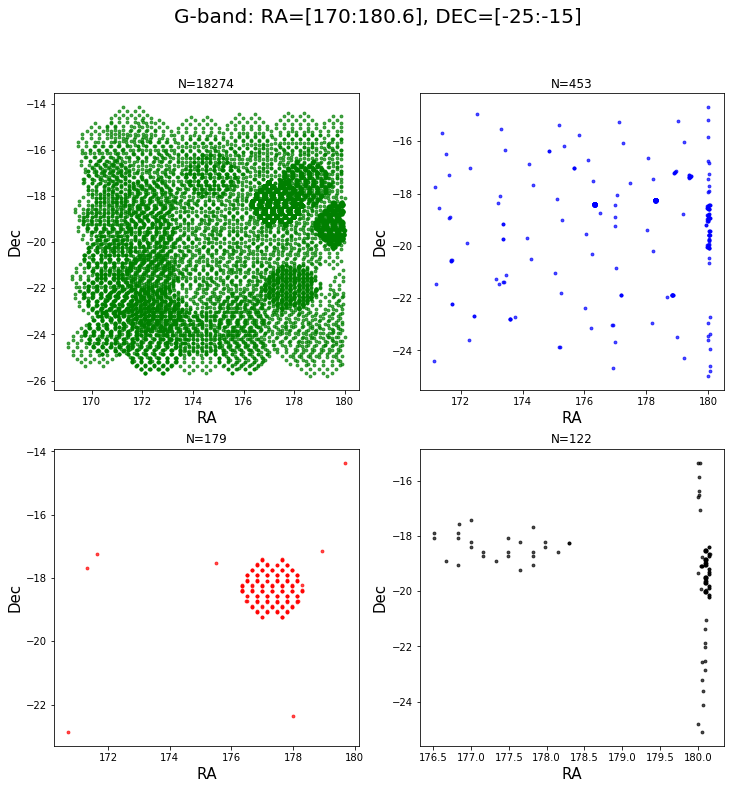

In [162]:
fig = plt.figure(figsize=(12,12))
plt.suptitle('G-band: RA=[170:180.6], DEC=[-25:-15]',fontsize=20)
plt.subplot(221)
plt.title("N="+str(len(gzpts.dropna()['RA_CENT_2_MEDIAN'][ind1])))
plt.scatter(gzpts.dropna()['RA_CENT_2_MEDIAN'][ind1],
            gzpts.dropna()['DEC_CENT_2_MEDIAN'][ind1],
            s=8,alpha=0.7,c="green")
plt.xlabel('RA',fontsize=15)
plt.ylabel('Dec',fontsize=15)

plt.subplot(222)
plt.title("N="+str(len(gzpts.dropna()['RA_CENT_2_MEDIAN'][ind2])))
plt.scatter(gzpts.dropna()['RA_CENT_2_MEDIAN'][ind2],
            gzpts.dropna()['DEC_CENT_2_MEDIAN'][ind2],
            s=8,alpha=0.7,c="blue")
plt.xlabel('RA',fontsize=15)
plt.ylabel('Dec',fontsize=15)

plt.subplot(223)
plt.title("N="+str(len(gzpts.dropna()['RA_CENT_2_MEDIAN'][ind3])))
plt.scatter(gzpts.dropna()['RA_CENT_2_MEDIAN'][ind3],
            gzpts.dropna()['DEC_CENT_2_MEDIAN'][ind3],
            s=8,alpha=0.7,c="red")
plt.xlabel('RA',fontsize=15)
plt.ylabel('Dec',fontsize=15)

plt.subplot(224)
plt.title("N="+str(len(gzpts.dropna()['RA_CENT_2_MEDIAN'][ind4])))
plt.scatter(gzpts.dropna()['RA_CENT_2_MEDIAN'][ind4],
            gzpts.dropna()['DEC_CENT_2_MEDIAN'][ind4],
            s=8,alpha=0.7,c="black")
plt.xlabel('RA',fontsize=15)
plt.ylabel('Dec',fontsize=15)
# plt.scatter(gzpts.dropna()["MAG_ZERO_NUM"][(gzpts.dropna()["MAG_ZERO_MEAN_ERR"]>10**-2)],
#             gzpts.dropna()["MAG_ZERO_MEAN_ERR"][(gzpts.dropna()["MAG_ZERO_MEAN_ERR"]>10**-2)],s=8,alpha=0.7,c="red")
# plt.scatter(gzpts.dropna()["MAG_ZERO_NUM"][(gzpts.dropna()["MAG_ZERO_NUM"]<30)],
#             gzpts.dropna()["MAG_ZERO_MEAN_ERR"][(gzpts.dropna()["MAG_ZERO_NUM"]<30)],s=8,alpha=0.7,c="black")
plt.savefig('./plots/202002_Gband_wide_radec.png')
fig

## I-Band

There are 294 exposures with MAG_ZERO_NUM < 5 this corresponds to 23 uniqe DECAM images

In [8]:
izpts=pd.read_csv(zptpath+'zps.matched-rawdata_refcat2_DEEP.i.csv')
#badset=gzpts[gzpts["MAG_ZERO_NUM"] < 5]
#expnumset=[int(i[3:9]) for i in badset["FILENAME_2"].values]
#gerr_big_set=gzpts[(gzpts["MAG_ZERO_NUM"] < 30) ]
#gerr_expnum=[int(i[3:9]) for i in gerr_big_set["FILENAME_2"].values]
#gerr_vec=[i in gerr_expnum for i in df_filepaths["EXPNUM"]]

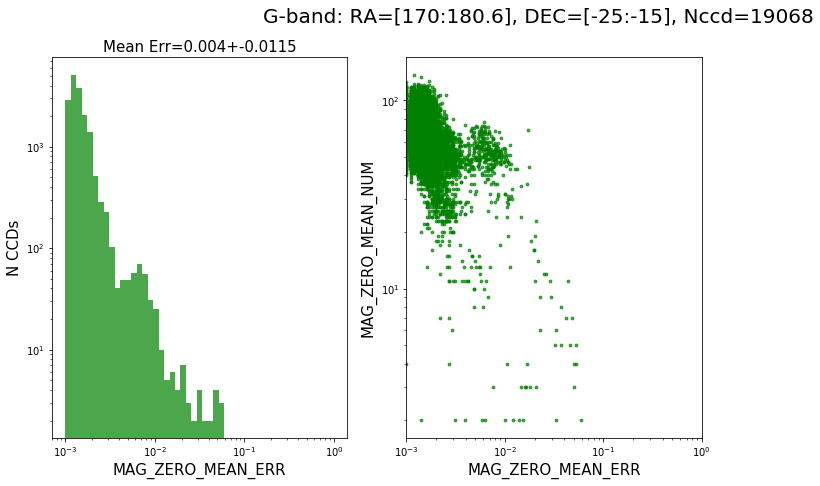

In [16]:
logbins=10**np.linspace(-3,0,50)
fig = plt.figure(figsize=(18,7))
plt.suptitle('G-band: RA=[170:180.6], DEC=[-25:-15], Nccd='+str(len(gzpts['MAG_ZERO_MEAN_ERR'])),fontsize=20)
plt.subplot(131)

plt.hist(izpts['MAG_ZERO_MEAN_ERR'].dropna(), alpha=0.7, color="green", bins=logbins)
plt.yscale('log')
plt.xscale('log')


plt.ylabel("N CCDs",fontsize=15)
plt.xlabel("MAG_ZERO_MEAN_ERR",fontsize=15)
#cb = plt.colorbar()
#cb.set_label('MAG_ZERO_MEAN')
plt.title('Mean Err='+str(round(np.mean(gzpts['MAG_ZERO_MEAN_ERR'].dropna()),4))
          +"+-"+str(round(np.std(gzpts['MAG_ZERO_MEAN_ERR'].dropna()),4)),fontsize=15)

plt.subplot(132)
#plt.hist2d(np.log(gzpts.dropna()["MAG_ZERO_NUM"]),np.log(gzpts.dropna()["MAG_ZERO_MEAN_ERR"]),
#           bins=50,norm=mcolors.PowerNorm(0.4))#,s=8,alpha=0.7,c="green")
plt.scatter(izpts.dropna()["MAG_ZERO_MEAN_ERR"],
            izpts.dropna()["MAG_ZERO_NUM"],s=8,alpha=0.7,c="green")
# plt.scatter(gzpts.dropna()["MAG_ZERO_MEAN_ERR"][ind2],
#             gzpts.dropna()["MAG_ZERO_NUM"][ind2],s=8,alpha=0.7,c="blue")
# plt.scatter(gzpts.dropna()["MAG_ZERO_MEAN_ERR"][ind3],
#             gzpts.dropna()["MAG_ZERO_NUM"][ind3],s=8,alpha=0.7,c="red")
# plt.scatter(gzpts.dropna()["MAG_ZERO_MEAN_ERR"][ind4],
#             gzpts.dropna()["MAG_ZERO_NUM"][ind4],s=8,alpha=0.7,c="black")
# plt.scatter(gzpts.dropna()["MAG_ZERO_NUM"][(gzpts.dropna()["MAG_ZERO_NUM"]<55)],
#             gzpts.dropna()["MAG_ZERO_MEAN_ERR"][(gzpts.dropna()["MAG_ZERO_NUM"]<55)],s=8,alpha=0.7,c="blue")
# plt.scatter(gzpts.dropna()["MAG_ZERO_NUM"][(gzpts.dropna()["MAG_ZERO_MEAN_ERR"]>10**-2)],
#             gzpts.dropna()["MAG_ZERO_MEAN_ERR"][(gzpts.dropna()["MAG_ZERO_MEAN_ERR"]>10**-2)],s=8,alpha=0.7,c="red")
# plt.scatter(gzpts.dropna()["MAG_ZERO_NUM"][(gzpts.dropna()["MAG_ZERO_NUM"]<30)],
#             gzpts.dropna()["MAG_ZERO_MEAN_ERR"][(gzpts.dropna()["MAG_ZERO_NUM"]<30)],s=8,alpha=0.7,c="black")
plt.yscale('log')
plt.xscale('log')
plt.xlim(10**-3,1)
plt.ylabel("MAG_ZERO_MEAN_NUM",fontsize=15)
plt.xlabel("MAG_ZERO_MEAN_ERR",fontsize=15)

# plt.subplot(133)
# plt.scatter(gzpts.dropna()["MAG_ZERO_MEAN_ERR"][ind1],
#             gzpts.dropna()["MAG_ZERO_MEDIAN"][ind1],s=8,alpha=0.7,c="green")
# plt.scatter(gzpts.dropna()["MAG_ZERO_MEAN_ERR"][ind2],
#             gzpts.dropna()["MAG_ZERO_MEDIAN"][ind2],s=8,alpha=0.7,c="blue")
# plt.scatter(gzpts.dropna()["MAG_ZERO_MEAN_ERR"][ind3],
#             gzpts.dropna()["MAG_ZERO_MEDIAN"][ind3],s=8,alpha=0.7,c="red")
# plt.scatter(gzpts.dropna()["MAG_ZERO_MEAN_ERR"][ind4],
#             gzpts.dropna()["MAG_ZERO_MEDIAN"][ind4],s=8,alpha=0.7,c="black")
# plt.xlim(10**-3,1)
# plt.ylim(30,33)
# plt.xscale('log')
# plt.ylabel("MAG_ZERO_MEDIAN",fontsize=15)
# plt.xlabel("MAG_ZERO_MEAN_ERR",fontsize=15)

fig

In [ ]:
gframe=pd.DataFrame()
for i in gzpts["FILENAME_2"]:
 gframe=gframe.append(df_filepaths[df_filepaths["EXPNUM"]==int(i[3:9])])

In [161]:
(18274.0)/19068

0.9583595552758548

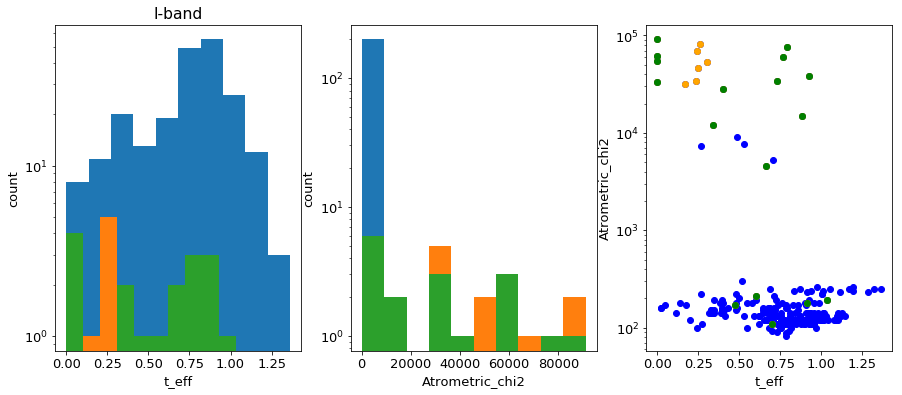

In [198]:
plt.rcParams['figure.figsize'] = [15, 6]
plt.subplot(1, 3, 1)
plt.hist(df_filepaths["t_eff"])
plt.hist(df_filepaths[tvec]["t_eff"])
plt.hist(df_filepaths[tvec2]["t_eff"])
plt.yscale("log")
plt.title('I-band')
plt.ylabel('count')
plt.xlabel('t_eff')

plt.subplot(1,3, 2)
plt.hist(df_filepaths["astrom_chi2"])
plt.hist(df_filepaths[tvec]["astrom_chi2"])
plt.hist(df_filepaths[tvec2]["astrom_chi2"])
plt.yscale("log")
plt.xlabel('Atrometric_chi2')
plt.ylabel('count')


plt.subplot(1,3, 3)
plt.plot(df_filepaths["t_eff"],df_filepaths["astrom_chi2"], "bo")
plt.plot(df_filepaths[tvec]["t_eff"],df_filepaths[tvec]["astrom_chi2"], "o", color="orange")
plt.plot(df_filepaths[tvec2]["t_eff"],df_filepaths[tvec2]["astrom_chi2"], "go")
plt.yscale("log")
plt.xlabel('t_eff')
plt.ylabel('Atrometric_chi2')
plt.show()

- Blue shows all data
- Green show data where RA > 100  & MAG_ZERO_NUM < 5
- Orange shows the same as green for RA < 100

These plots show that astrometric_chi2 Identifies many of the exposures where the MAG_ZERO_NUM is low. 
18/23 low MAG_ZERO_NUM images show an astrometric_chi2 > 1000

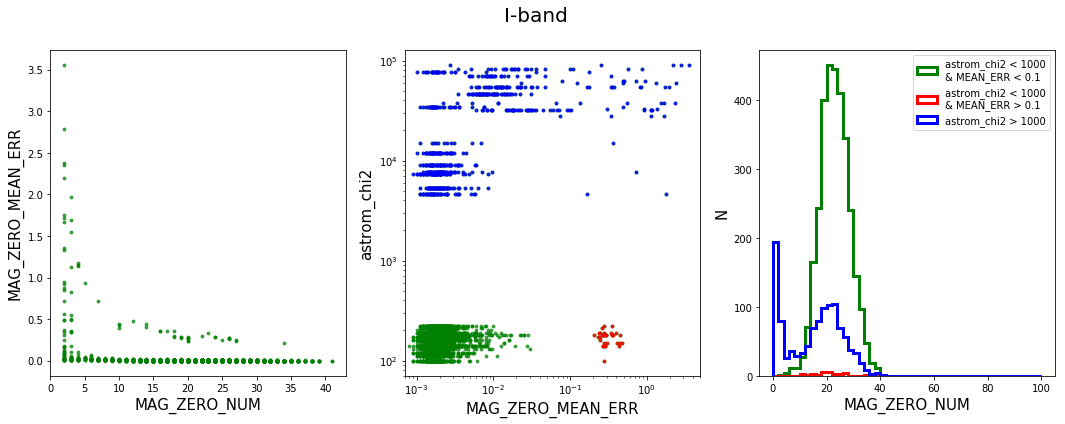

In [61]:
fig = plt.figure(figsize=(18,6))
plt.suptitle('I-band',fontsize=20)
plt.subplot(131)
plt.scatter(izpts["MAG_ZERO_NUM"],izpts["MAG_ZERO_MEAN_ERR"],s=8,alpha=0.7,c="green")
plt.xlabel("MAG_ZERO_NUM",fontsize=15)
plt.ylabel("MAG_ZERO_MEAN_ERR",fontsize=15)

plt.subplot(132)
plt.scatter(izpts["MAG_ZERO_MEAN_ERR"],iframe["astrom_chi2"],s=8,alpha=0.7,c="green")
plt.scatter(izpts["MAG_ZERO_MEAN_ERR"][(iframe["astrom_chi2"] > 1000).reset_index()["astrom_chi2"]],
            iframe["astrom_chi2"][iframe["astrom_chi2"] > 1000],s=8,alpha=0.7,c="blue")
plt.scatter(izpts["MAG_ZERO_MEAN_ERR"][(iframe["astrom_chi2"] < 1000).reset_index()["astrom_chi2"] & (izpts["MAG_ZERO_MEAN_ERR"]> 0.1)],
            iframe.reset_index()["astrom_chi2"][(iframe["astrom_chi2"] < 1000).reset_index()["astrom_chi2"] & (izpts["MAG_ZERO_MEAN_ERR"]> 0.1)]
            ,s=8,alpha=0.7,c="red")
plt.yscale("log")
plt.xscale("log")
plt.xlabel("MAG_ZERO_MEAN_ERR",fontsize=15)
plt.ylabel("astrom_chi2",fontsize=15)
plt.xlim(7e-4,5)
plt.subplot(133)
h = plt.hist(izpts["MAG_ZERO_NUM"][(iframe["astrom_chi2"] < 200).reset_index()["astrom_chi2"] & (izpts["MAG_ZERO_MEAN_ERR"]< 0.1)],bins=50,range=(0,100),histtype='step',lw=3, color="green")
h = plt.hist(izpts["MAG_ZERO_NUM"][(iframe["astrom_chi2"] < 200).reset_index()["astrom_chi2"] & (izpts["MAG_ZERO_MEAN_ERR"]> 0.1)],bins=50,range=(0,100),histtype='step',lw=3, color="red")
h = plt.hist(izpts["MAG_ZERO_NUM"][(iframe["astrom_chi2"] > 200).reset_index()["astrom_chi2"]],bins=50,range=(0,100),histtype='step',lw=3, color="blue")
plt.legend(['astrom_chi2 < 1000\n& MEAN_ERR < 0.1','astrom_chi2 < 1000\n& MEAN_ERR > 0.1','astrom_chi2 > 1000'])
plt.xlabel('MAG_ZERO_NUM',fontsize=15)
plt.ylabel('N',fontsize=15)
plt.savefig('./plots/191212_Iband_astrom_chi2.png')

In [62]:
index_2=(izpts["MAG_ZERO_MEAN_ERR"] > 0.1) & (iframe["astrom_chi2"] < 1000).reset_index()["astrom_chi2"]
interesting_set=izpts[index_2]
int2=iframe.reset_index()[index_2]

In [91]:
print(len(izpts["MAG_ZERO_MEAN_ERR"]))
print(len(izpts["MAG_ZERO_MEAN_ERR"][(iframe["astrom_chi2"] > 1000).reset_index()["astrom_chi2"]]))
print(len(izpts["MAG_ZERO_MEAN"][(iframe["astrom_chi2"] < 1000).reset_index()["astrom_chi2"] & (izpts["MAG_ZERO_MEAN_ERR"]> 0.1)]))

4363-824-32

4363
824
32


3507

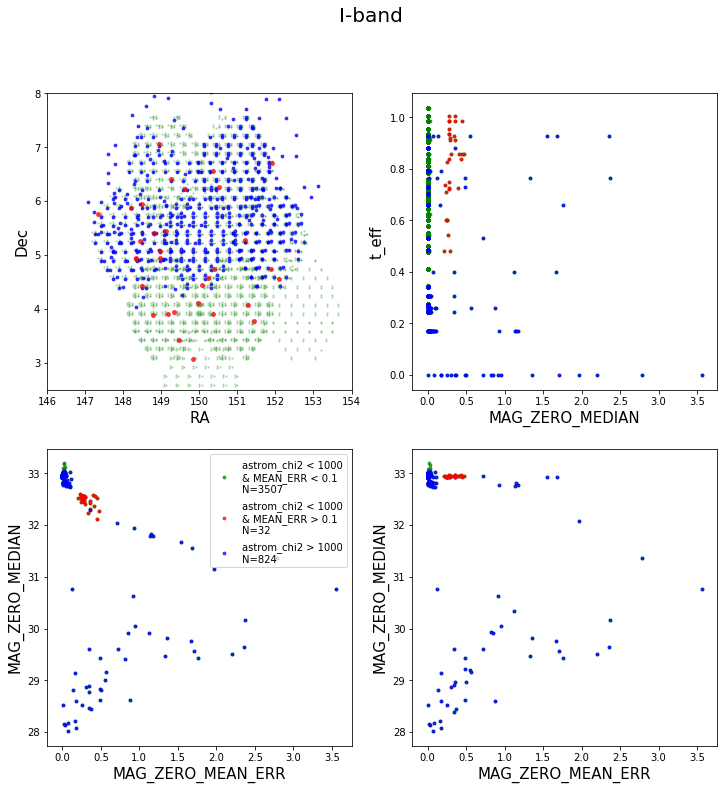

In [98]:
fig = plt.figure(figsize=(12,12))

plt.suptitle('G-band',fontsize=20)
plt.subplot(221)
#plt.scatter(interesting_set['RA_CENT_2_MEDIAN'],interesting_set['DEC_CENT_2_MEDIAN'],s=8,alpha=0.7,vmax=0.01)
plt.scatter(gzpts['RA_CENT_2_MEDIAN'],gzpts['DEC_CENT_2_MEDIAN'],s=2,alpha=0.2,c="green")
plt.scatter(izpts['RA_CENT_2_MEDIAN'][(iframe["astrom_chi2"] > 1000).reset_index()["astrom_chi2"]],
            izpts['DEC_CENT_2_MEDIAN'][(iframe["astrom_chi2"] > 1000).reset_index()["astrom_chi2"]],s=8,alpha=0.7,c="blue")
plt.scatter(izpts['RA_CENT_2_MEDIAN'][(iframe["astrom_chi2"] < 1000).reset_index()["astrom_chi2"] & (izpts["MAG_ZERO_MEAN_ERR"]> 0.1)],
            izpts['DEC_CENT_2_MEDIAN'][(iframe["astrom_chi2"] < 1000).reset_index()["astrom_chi2"] & (izpts["MAG_ZERO_MEAN_ERR"]> 0.1)],s=15,alpha=0.7,c="red")

plt.xlim(146,154)
plt.ylim(2.5,8)
plt.xlabel('RA',fontsize=15)
plt.ylabel('Dec',fontsize=15)
#cb = plt.colorbar()
#cb.set_label('MAG_ZERO_MEAN_ERR')

plt.subplot(222)
plt.scatter(izpts["MAG_ZERO_MEAN_ERR"],iframe["t_eff"],s=8,alpha=0.7,c="green")
plt.scatter(izpts["MAG_ZERO_MEAN_ERR"][(iframe["astrom_chi2"] < 1000).reset_index()["astrom_chi2"] & (izpts["MAG_ZERO_MEAN_ERR"]> 0.1)],
            iframe.reset_index()["t_eff"][(iframe["astrom_chi2"] < 1000).reset_index()["astrom_chi2"] & (izpts["MAG_ZERO_MEAN_ERR"]> 0.1)]
            ,s=8,alpha=0.7,c="red")
plt.scatter(izpts["MAG_ZERO_MEAN_ERR"][(iframe["astrom_chi2"] > 1000).reset_index()["astrom_chi2"]],
            iframe["t_eff"][iframe["astrom_chi2"] > 1000]
            ,s=8,alpha=0.7,c="blue")
plt.xlabel("MAG_ZERO_MEDIAN",fontsize=15)
plt.ylabel("t_eff",fontsize=15)


plt.subplot(223)
plt.scatter(izpts["MAG_ZERO_MEAN_ERR"],izpts["MAG_ZERO_MEAN"],s=8,alpha=0.7,c="green")
plt.scatter(izpts["MAG_ZERO_MEAN_ERR"][(iframe["astrom_chi2"] < 1000).reset_index()["astrom_chi2"] & (izpts["MAG_ZERO_MEAN_ERR"]> 0.1)],
            izpts["MAG_ZERO_MEAN"][(iframe["astrom_chi2"] < 1000).reset_index()["astrom_chi2"] & (izpts["MAG_ZERO_MEAN_ERR"]> 0.1)],s=8,alpha=0.7,c="red")
plt.scatter(izpts["MAG_ZERO_MEAN_ERR"][(iframe["astrom_chi2"] > 1000).reset_index()["astrom_chi2"]],
            izpts["MAG_ZERO_MEAN"][(iframe["astrom_chi2"] > 1000).reset_index()["astrom_chi2"]],s=8,alpha=0.7,c="blue")
plt.legend(['astrom_chi2 < 1000\n& MEAN_ERR < 0.1\nN=3507','astrom_chi2 < 1000\n& MEAN_ERR > 0.1\nN=32','astrom_chi2 > 1000\nN=824'])
plt.ylabel("MAG_ZERO_MEDIAN",fontsize=15)
plt.xlabel("MAG_ZERO_MEAN_ERR",fontsize=15)

plt.subplot(224)
plt.scatter(izpts["MAG_ZERO_MEAN_ERR"],izpts["MAG_ZERO_MEDIAN"],s=8,alpha=0.7,c="green")
plt.scatter(izpts["MAG_ZERO_MEAN_ERR"][(iframe["astrom_chi2"] > 1000).reset_index()["astrom_chi2"]],
            izpts["MAG_ZERO_MEDIAN"][(iframe["astrom_chi2"] > 1000).reset_index()["astrom_chi2"]],s=8,alpha=0.7,c="blue")
plt.scatter(izpts["MAG_ZERO_MEAN_ERR"][(iframe["astrom_chi2"] < 1000).reset_index()["astrom_chi2"] & (izpts["MAG_ZERO_MEAN_ERR"]> 0.1)],
            izpts["MAG_ZERO_MEDIAN"][(iframe["astrom_chi2"] < 1000).reset_index()["astrom_chi2"] & (izpts["MAG_ZERO_MEAN_ERR"]> 0.1)],s=8,alpha=0.7,c="red")
plt.ylabel("MAG_ZERO_MEDIAN",fontsize=15)
plt.xlabel("MAG_ZERO_MEAN_ERR",fontsize=15)
plt.savefig('./plots/191212_Iband_zeropoint_vals.png')

Text(0.5,0,'MAG_ZERO_MEAN_ERR')

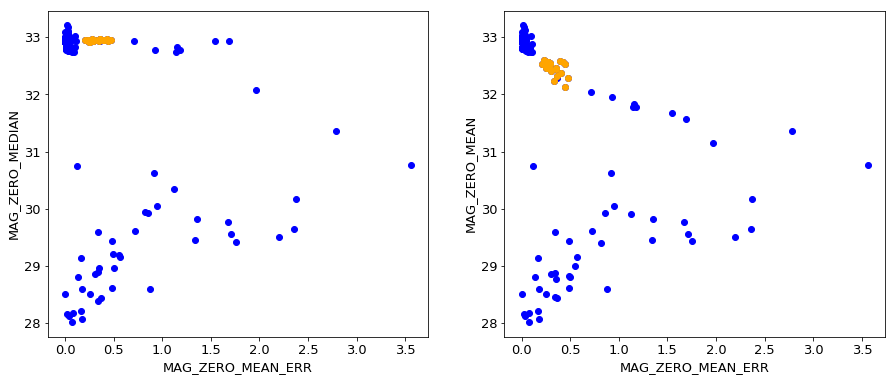

In [249]:
var2="MAG_ZERO_MEDIAN"
plt.subplot(1,2, 1)
plt.plot(izpts["MAG_ZERO_MEAN_ERR"], izpts[var2], "bo")
plt.plot(interesting_set["MAG_ZERO_MEAN_ERR"], interesting_set[var2], "o", color="orange")
plt.ylabel("MAG_ZERO_MEDIAN")
plt.xlabel("MAG_ZERO_MEAN_ERR")

plt.subplot(1,2, 2)
plt.plot(izpts["MAG_ZERO_MEAN_ERR"], izpts["MAG_ZERO_MEAN"], "bo")
plt.plot(interesting_set["MAG_ZERO_MEAN_ERR"], interesting_set["MAG_ZERO_MEAN"], "o", color="orange")
plt.ylabel("MAG_ZERO_MEAN")
plt.xlabel("MAG_ZERO_MEAN_ERR")

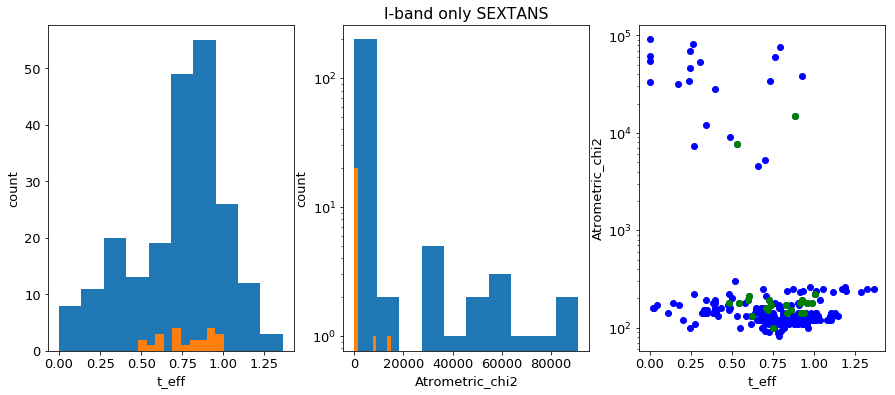

In [263]:
plt.rcParams['figure.figsize'] = [15, 6]
plt.subplot(1, 3, 1)
plt.hist(df_filepaths["t_eff"])
plt.hist(df_filepaths[err_vec]["t_eff"])

plt.ylabel('count')
plt.xlabel('t_eff')

plt.subplot(1,3, 2)
plt.title('I-band only SEXTANS')
plt.hist(df_filepaths["astrom_chi2"])
plt.hist(df_filepaths[err_vec]["astrom_chi2"])
plt.yscale("log")
plt.xlabel('Atrometric_chi2')
plt.ylabel('count')


plt.subplot(1,3, 3)
plt.plot(df_filepaths["t_eff"],df_filepaths["astrom_chi2"], "bo")
plt.plot(df_filepaths[err_vec]["t_eff"],df_filepaths[err_vec]["astrom_chi2"], "go")
plt.yscale("log")
plt.xlabel('t_eff')
plt.ylabel('Atrometric_chi2')
plt.show()

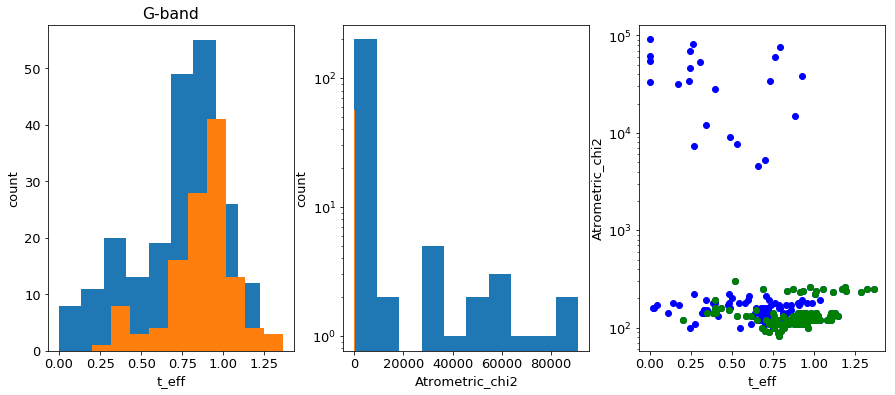

In [264]:
plt.rcParams['figure.figsize'] = [15, 6]
plt.subplot(1, 3, 1)
plt.hist(df_filepaths["t_eff"])
plt.hist(df_filepaths[gerr_vec]["t_eff"])
plt.title('G-band')
plt.ylabel('count')
plt.xlabel('t_eff')

plt.subplot(1,3, 2)
plt.hist(df_filepaths["astrom_chi2"])
plt.hist(df_filepaths[gerr_vec]["astrom_chi2"])
plt.yscale("log")
plt.xlabel('Atrometric_chi2')
plt.ylabel('count')


plt.subplot(1,3, 3)
plt.plot(df_filepaths["t_eff"],df_filepaths["astrom_chi2"], "bo")
plt.plot(df_filepaths[gerr_vec]["t_eff"],df_filepaths[gerr_vec]["astrom_chi2"], "go")
plt.yscale("log")
plt.xlabel('t_eff')
plt.ylabel('Atrometric_chi2')
plt.show()